<a href="https://colab.research.google.com/github/harnalashok/DataVisualization/blob/master/partial_dependence_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 10th June, 2022
# My folder: 
# Ref: 
#     1. https://www.kaggle.com/code/dansbecker/partial-dependence-plots/notebook
#     2. https://scikit-learn.org/stable/modules/partial_dependence.html
#     3. 


See this [link](https://cran.r-project.org/web/packages/datarobot/vignettes/PartialDependence.html)

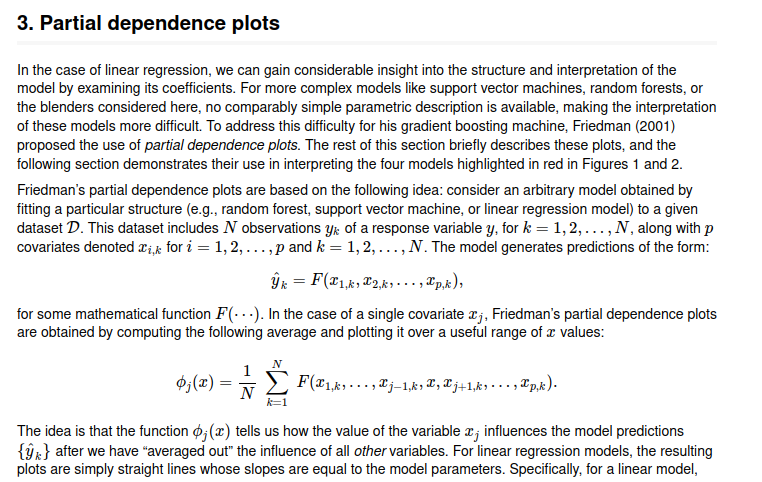

In the following equation function F(X) is model for making predictions. We get this model after fitting over the example dataset. We then start making predictions. We are interested in relationship between jth feature (X2 in the below example) and the target. So, select a value of jth feature (say, 0.1). For all N rows of 'test' data keep the value of this feature as constant but vary all other values. Make predictions and the naverage them out over all N-rows. Repeat this for a different value of jth feature (say, 0.2) and then finally plot how average predictions change as jth feature changes.


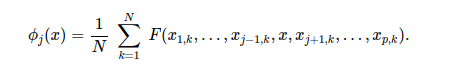

A more complete example is below

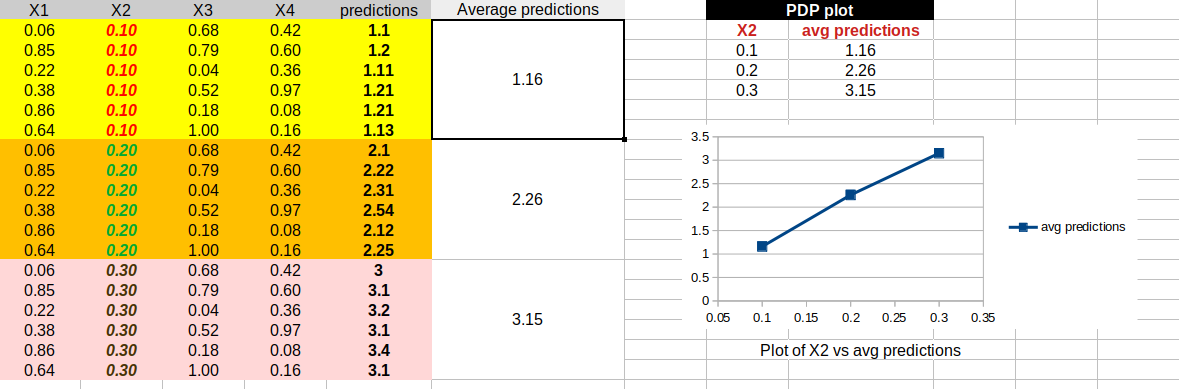

(File: howTopdpPlots.ods)

## What does y-axis represent
See Stackoverflow [here](https://stats.stackexchange.com/a/468257)

y-axis reprsents *changes* relative to an overall central tendency. This central tendency may be mean or median. For example it can be `y= y- y_median` or it can be `y = y-y_mean` . The central tendency used is a bit of the author's choice. For more details see the above link.

**make_hastie dataset**<br>
It is a randomly generated classification dataset. Data is generated for binary classification used. It has been used by Hastie in his book of 2009, Example 10.2.  The ten features are standard independent Gaussian and the target y is defined by:



```
y[i] = 1 if np.sum(X[i] ** 2) > 9.34 else -1

```





In [ ]:
# Import make_hastie_10_2 function to create dataset
from sklearn.datasets import make_hastie_10_2

In [ ]:
# Import other lpackages
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot  as plt

In [ ]:
# Show multiple outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Generate dataset
X, y = make_hastie_10_2(random_state=0)

In [ ]:
# Check shape
#  Set of predictors with 10 features and one binary target:
X.shape   # (12000, 10)
y.shape

(12000, 10)

In [ ]:
# Show first three rows:
X[:3,:]

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
         0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877]])

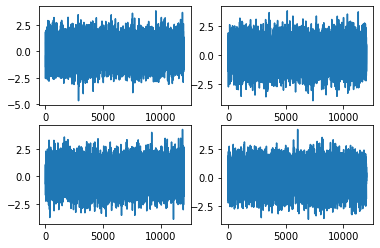

In [ ]:
# Plot of first three columns
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
ax[0].plot(X[:,0]);
ax[1].plot(X[:,1]);
ax[2].plot(X[:,2]);
ax[3].plot(X[:,3]);

In [ ]:
# Develop predictive model
clf = GradientBoostingClassifier(
                                  n_estimators=100,
                                  learning_rate=1.0,
                                   max_depth=1,
                                  random_state=0
                                  )

# 
clf.fit(X, y)

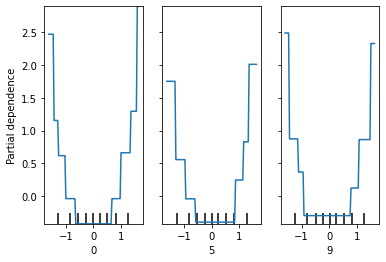

In [ ]:
# Get three pdp plots for features with index 0,5,9
features = [0,5,9]
PartialDependenceDisplay.from_estimator(clf, X, features) ;

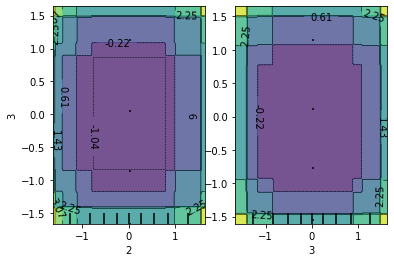

In [ ]:
# Get pdp plots for combination of fetaures (2,3) and with features (3,9)
#  Note in our data feature with index 10 does not exist.
features = [(2,3), (3,9)]
PartialDependenceDisplay.from_estimator(clf, X, features) ;

PDPs with two input features of interest show the interactions among the two features. For example, the two-variable PDP in the below figure shows the dependence of median house price (target) on joint values of two features: house age and average occupants per household. We can clearly see an interaction between the two features: for an average occupancy greater than two, the house price is nearly independent of the house age, whereas for values less than 2 there is a strong dependence on age. See [this link](https://scikit-learn.org/stable/modules/partial_dependence.html).

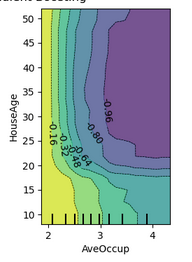